### ESMA 4016
### Componentes Principales
### Edgar Acuna

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Ejemplo 1. Aplicando PCA en  Diabetes

In [33]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]

### Normalizando (estandarizando ) los datos

In [34]:
X = StandardScaler().fit_transform(X)

### Usando solo 2 componentes principales

In [35]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 2.09711056  1.73346726]
[ 0.26179749  0.21640127]
[ 0.26179749  0.47819876]


Comentario: Las dos componentes principales solo acumulan el 45.85% de la variacion de los datos originales. La Varianza de cada componente aun es mayor que 1. Se necesitan usar mas componentes

In [36]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print "Este la precision con 2 PC=", precision

Este la precision con 2 PC= 0.717447916667


In [37]:
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDF.head()

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [38]:
#hallando la correlacion de las dos primeras compoenentes principales
pcaDF.corr()

,PC1,PC2
PC1,1.000000e+00,-8.753378e-17
PC2,-8.753378e-17,1.000000e+00


Notar que la correlacion entre PC1 y PC2 es 0

In [39]:
finalDf = pd.concat([pcaDF, data[['class']]], axis = 1)
finalDf.head(5)

,PC1,PC2,class
0,1.068503,1.234895,2
1,-1.121683,-0.733852,1
2,-0.396477,1.595876,2
3,-1.115781,-1.271241,1
4,2.359334,-2.184819,2


### Visualizando la proyeccion en el plano

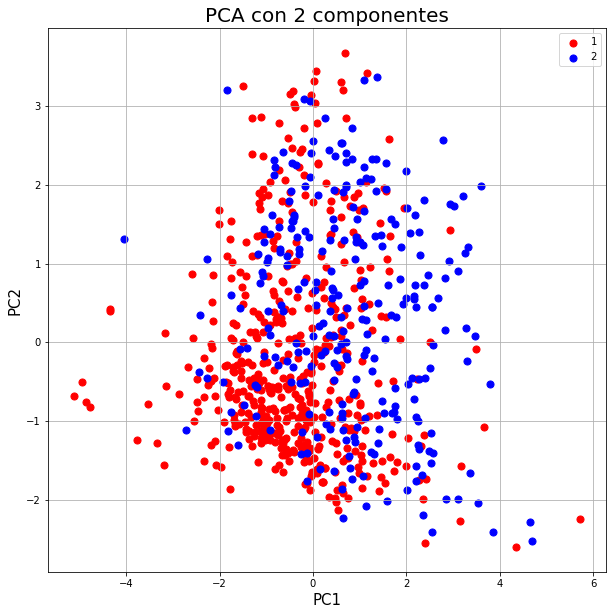

In [40]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)


targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Usando tres componentes principales para Diabetes

In [41]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 2.09711056  1.73346726  1.03097228]
[ 0.26179749  0.21640127  0.12870373]
[ 0.26179749  0.47819876  0.60690249]


Comentario: las tres primeras componentes principales acumulan solo el 53.30% de la variacion Total. Todas las varianzas tienen varianza mayor que 1.  Aun se  necesitan mas componentes

In [42]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print "Este la precision con tres PC=", precision

Este la precision con tres PC= 0.73046875


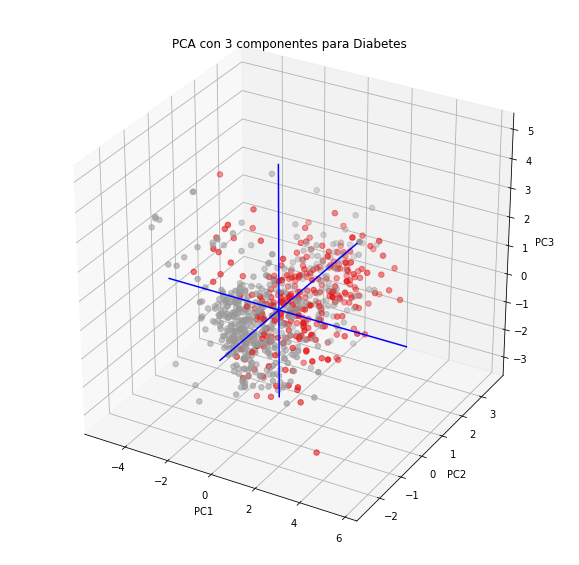

In [43]:
#Haciendo la grafica 3D
# Store results of PCA in a data frame
result=pd.DataFrame(principalComponents, columns=['PCA%i' % i for i in range(3)], index=data.index)
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y,  cmap="Set1_r", s=30)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'b')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'b')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA con 3 componentes para Diabetes")
#plt.show()


In [44]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ldadis.score(principalComponents, y)

0.73046875

### Screeplot para decidir acerca del numero optimo de componentes

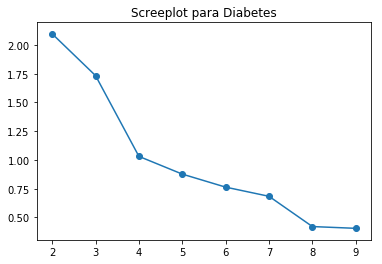

In [45]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
y=pca.explained_variance_
x=range(2,10)
plt.scatter(x,y)
plt.plot(x,y)
plt.title("Screeplot para Diabetes")

### Ejemplo 2: Aplicando PCA en Landsat

In [46]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
X = StandardScaler().fit_transform(X)
#y1=y.as_matrix()
#X1=X.as_matrix()

In [47]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 16.48810712  14.08354844]
[ 0.45789971  0.39112147]
[ 0.45789971  0.84902117]


In [48]:
pcaDF['class']=y
finalDf=pcaDF
finalDf.head(5)

,PC1,PC2,class
0,6.834693,-1.227693,3
1,4.468832,-1.793191,3
2,3.357241,-2.091086,3
3,2.848765,-2.155377,3
4,2.921087,-1.790118,3


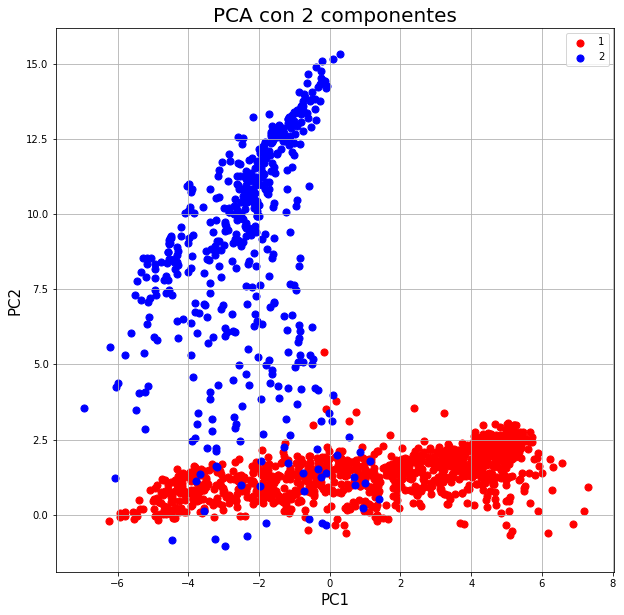

In [49]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)


targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [50]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 16.48810712  14.08354844   1.60839775]
[ 0.45789971  0.39112147  0.04466764]
[ 0.45789971  0.84902117  0.89368882]
